In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv("airline_passengers.csv", index_col='Month')

In [5]:
airline.dropna(inplace=True)

In [6]:
airline.index = pd.to_datetime(airline.index)

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
airline['6-Month-MA'] = airline['Thousands of Passengers'].rolling(6).mean()

In [9]:
airline['12-Month-MA'] = airline['Thousands of Passengers'].rolling(12).mean()

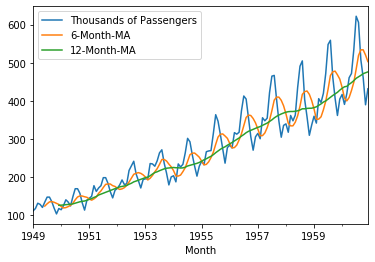

In [10]:
airline.plot()

In [11]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

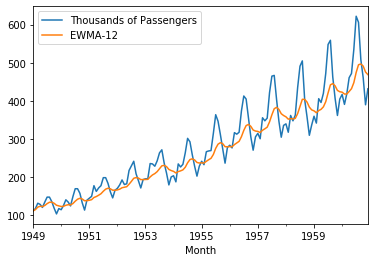

In [12]:
airline[['Thousands of Passengers', 'EWMA-12']].plot()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')

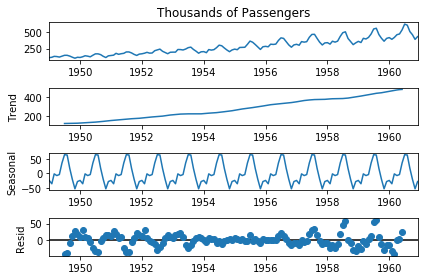

In [23]:
fig = result.plot()

In [24]:
result2 = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

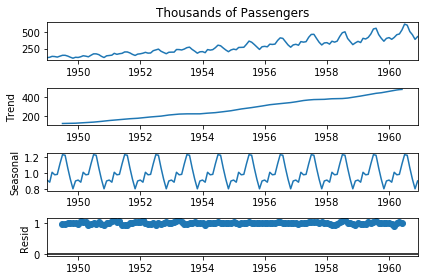

In [25]:
fig2 = result2.plot()